In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pwd

'/content'

In [3]:
cd /content/drive/My Drive/Colab Notebooks/dataset/

/content/drive/My Drive/Colab Notebooks/dataset


In [4]:
data = pd.read_csv('data.csv')
data.head(15)

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
5,6.988889,0.0,5.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
6,2.686806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
7,5.364583,0.0,4.0,0.0,0.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
8,19.197917,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
9,3.565972,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [5]:
data.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
count,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000
mean,10.228510,0.370711,2.260007,0.077121,0.617591,1.175030,0.503968,0.308502,2.362698,0.428963,0.371358,0.213943,0.219958,0.376727,0.012893,0.483688,0.683073,0.148794,0.431413,0.823030,0.155260,0.144993,0.679860,0.152772,0.022376,0.033172,0.105512,0.437232,0.414092,0.009993,0.206125,0.657112,0.136764,0.035464,0.102847,0.039109,0.127417,0.695162,0.230264,0.157572,0.533103,0.079060,0.056136,0.000294,0.412916,0.010052,0.232929,0.188726,0.098948
std,12.461440,0.652278,2.255679,0.357821,1.119265,1.345073,0.845481,0.670549,2.206709,0.856638,0.723226,0.558986,0.661356,0.759707,0.265499,1.396364,1.054149,0.503185,0.495278,0.381647,0.362156,0.352097,0.466535,0.359771,0.147904,0.179087,0.307215,0.496049,0.492569,0.099464,0.404525,0.474679,0.343601,0.184952,0.303762,0.193856,0.333443,0.460343,0.421006,0.364343,0.498908,0.269835,0.230186,0.017141,0.492363,0.099753,0.422702,0.391295,0.298595
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.857639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.583333,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.805556,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.0000

In [0]:
# Data is taken from MIMIC - https://mimic.physionet.org
# Understanding of dataset 
# LOS - Length of Stay 
#       { we need to predict LOS, so LOS will be our y axis }
# blood 
#       

In [6]:
if data.isnull().values.sum() != 0:
  data.dropna(axis = 0) # remove the row which has null value 
else:
  print('NO NULL VALUES')

NO NULL VALUES


In [7]:
Y = data['LOS'].values
X = data.drop(columns=['LOS'])
# print(LOS[:5])
X.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,ICU,NICU,ADM_ELECTIVE,ADM_EMERGENCY,ADM_NEWBORN,ADM_URGENT,INS_Government,INS_Medicaid,INS_Medicare,INS_Private,INS_Self Pay,REL_NOT SPECIFIED,REL_RELIGIOUS,REL_UNOBTAINABLE,ETH_ASIAN,ETH_BLACK/AFRICAN AMERICAN,ETH_HISPANIC/LATINO,ETH_OTHER/UNKNOWN,ETH_WHITE,AGE_middle_adult,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
3,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0


In [0]:
# splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [9]:
print('Training len = {}'.format(len(X_train)))
print('Testing len = {}'.format(len(X_test)))

Training len = 40829
Testing len = 10208


In [0]:
# applying ML models in the dataset
# saving their results in a dict 
result_test = {}
result_train = {}

In [0]:
from sklearn.metrics import mean_absolute_error

# returns the testing and training prediction of model
def get_prediction(model, train, test):
  return model.predict(train), model.predict(test)

# sets the accuracy in result_test and result__train 
def get_result(model, X_train, Y_train, X_test, Y_test):
  model_name = str(model).split('(')[0]
  y_train_pred, y_test_pred = get_prediction(model, X_train, X_test)
  result_test[model_name] =  mean_absolute_error(Y_test, y_test_pred)
  result_train[model_name] =  mean_absolute_error(Y_train, y_train_pred)
  print('{} done'.format(model_name))

In [0]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

def LinearReg(X_train, Y_train, X_test, Y_test):
  # declaring model
  model = LinearRegression()
  model.fit(X_train, Y_train) 
  get_result(model, X_train, Y_train, X_test, Y_test)

In [0]:
# KNN model
from sklearn.neighbors import KNeighborsRegressor

def KNN(X_train, Y_train, X_test, Y_test):
  model = KNeighborsRegressor()
  model.fit(X_train, Y_train)
  get_result(model, X_train, Y_train, X_test, Y_test)

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

def RForest(X_train, Y_train, X_test, Y_test):
  model = RandomForestRegressor(random_state = 0)
  model.fit(X_train, Y_train)
  get_result(model, X_train, Y_train, X_test, Y_test)

In [0]:
# SVM 
from sklearn.svm import SVR

def SupportVector(X_train, Y_train, X_test, Y_test):
  model = SVR()
  model.fit(X_train, Y_train)
  get_result(model, X_train, Y_train, X_test, Y_test)

In [0]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

def Boosting(X_train, Y_train, X_test, Y_test):
  model = GradientBoostingRegressor(random_state = 0)
  model.fit(X_train, Y_train)
  get_result(model, X_train, Y_train, X_test, Y_test)

In [17]:
LinearReg(X_train, Y_train, X_test, Y_test)

LinearRegression done


In [18]:
KNN(X_train, Y_train, X_test, Y_test)

KNeighborsRegressor done


In [19]:
RForest(X_train, Y_train, X_test, Y_test)

RandomForestRegressor done


In [20]:
SupportVector(X_train, Y_train, X_test, Y_test)

SVR done


In [21]:
Boosting(X_train, Y_train, X_test, Y_test)

GradientBoostingRegressor done


In [0]:
# method to get mean Error of models
def getMeanError(result):
  for model in result.keys():
    print('{} -> {}'.format(model, result[model]))

In [23]:
print('For TEST Data')
getMeanError(result_test)
print('-'*40)
print('For TRAINING Data')
getMeanError(result_train)

For TEST Data
LinearRegression -> 6.0279552790563065
KNeighborsRegressor -> 5.683584688479624
RandomForestRegressor -> 5.6730045635586235
SVR -> 5.129368532215417
GradientBoostingRegressor -> 5.493928568249062
----------------------------------------
For TRAINING Data
LinearRegression -> 6.0819702095617805
KNeighborsRegressor -> 4.713361938409791
RandomForestRegressor -> 2.3064747266025614
SVR -> 5.127459960221585
GradientBoostingRegressor -> 5.472992863828594


In [0]:
def myplot(result):
  # arr = list(result.values())
  # plt.plot(arr)
  # plt.show()
  y_axis = range(len(result))
  min_y = min(result.values())

  fig = plt.figure(figsize=(15,6))
  sub_plt = fig.subplots()

  sub_plt.bar(y_axis, list(result.values()) , alpha=0.8)
  plt.xticks(y_axis, result.keys())

  sub_plt.axhline(y=min_y, xmin=0, xmax=100, ls='-', color='red')


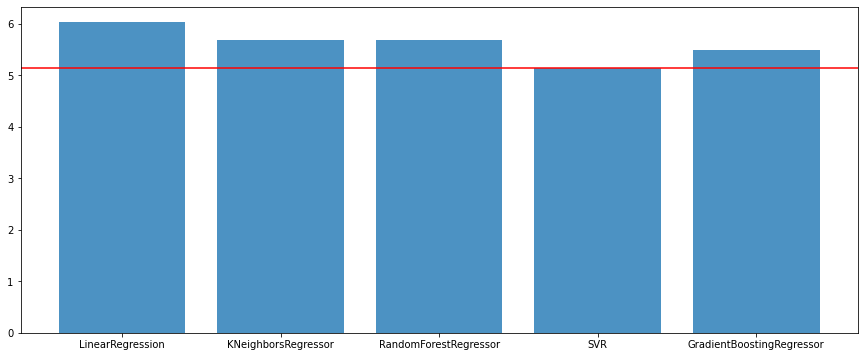

In [25]:
myplot(result_test)

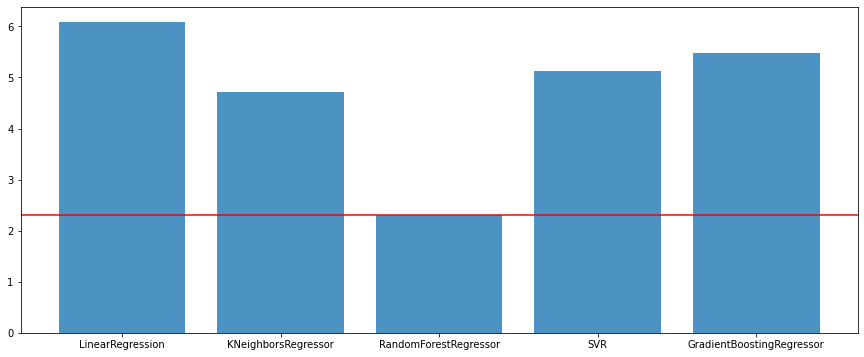

In [26]:
myplot(result_train)

In [27]:
pwd

'/content/drive/My Drive/Colab Notebooks/dataset'

In [28]:
cd ../models/

/content/drive/My Drive/Colab Notebooks/models


In [29]:
# saving the model using joblib
from sklearn.externals import joblib 
model = LinearRegression()
model.fit(X_train, Y_train) 
joblib.dump(model, 'model1.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model1.pkl']